In [2]:
import pandas as pd
import scipy.io as sio
import numpy as np

from iFEMG_feature import db2mat, BandPassFilter

In [3]:
"""
转换.db至.mat数据
"""
file_list = ["bi-0", "bi-05", "bi-1", "bi-2", "tri-0", "tri-05", "tri-1", "tri-2"]
db2mat(r"E:\Data\积水潭患者数据集\1024s1\affected", file_list)

File E:\Data\积水潭患者数据集\1024s1\affected\bi_0.mat saved!
File E:\Data\积水潭患者数据集\1024s1\affected\bi_05.mat saved!
File E:\Data\积水潭患者数据集\1024s1\affected\bi_1.mat saved!
File E:\Data\积水潭患者数据集\1024s1\affected\bi_2.mat saved!
E:\Data\积水潭患者数据集\1024s1\affected\tri-0.db doesn't exist!
E:\Data\积水潭患者数据集\1024s1\affected\tri-05.db doesn't exist!
E:\Data\积水潭患者数据集\1024s1\affected\tri-1.db doesn't exist!
E:\Data\积水潭患者数据集\1024s1\affected\tri-2.db doesn't exist!


In [9]:
# 读取数据，测试滤波
data = sio.loadmat(r"E:\Data\积水潭患者数据集\1010s1\affected\bi_2.mat")['bi_2']
bpf1_200 = BandPassFilter(1223, 1, 200, 4)
filted_data = bpf1_200.filt(data[:, 8])
filted_data


array([  35.68931503,  220.23590172,  360.41086179, ..., -161.433009  ,
       -161.58228544,  -88.36682349])

In [10]:
sio.savemat(r"E:\Data\积水潭患者数据集\1010s1\affected\bi_2_ch1_filted.mat", {'bi_2_ch1_filted': filted_data})

[-1.66743343e-06 -1.23262760e-05 -1.51406037e-05  2.64461263e-05
  4.92836398e-05 -9.58201490e-05 -1.99361971e-04  4.83070156e-04
  2.04391400e-03  2.72830758e-03  1.04474138e-03 -2.29841714e-04
  3.86599885e-03  1.07356909e-02  7.80011879e-03 -1.05352483e-02
 -2.65420991e-02 -1.76802700e-02  1.98094771e-03 -1.74665914e-02
 -9.23756474e-02 -1.49606172e-01 -8.49936397e-02  1.03320242e-01
  2.73977338e-01  2.73977338e-01  1.03320242e-01 -8.49936397e-02
 -1.49606172e-01 -9.23756474e-02 -1.74665914e-02  1.98094771e-03
 -1.76802700e-02 -2.65420991e-02 -1.05352483e-02  7.80011879e-03
  1.07356909e-02  3.86599885e-03 -2.29841714e-04  1.04474138e-03
  2.72830758e-03  2.04391400e-03  4.83070156e-04 -1.99361971e-04
 -9.58201490e-05  4.92836398e-05  2.64461263e-05 -1.51406037e-05
 -1.23262760e-05 -1.66743343e-06]


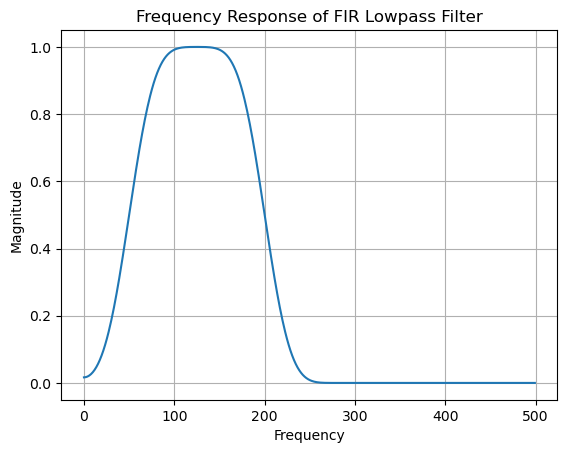

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 指定滤波器的阶数
order = 50

# 指定带通滤波器的截止频率和带宽
fs = 1000  # 采样率
lowcut = 50  # 低频截止频率
highcut = 200  # 高频截止频率
bandwidth = highcut - lowcut  # 带宽

# 计算归一化的截止频率和带宽
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
width = bandwidth / nyquist

# 设计FIR带通滤波器的系数
taps = signal.firwin(order, [low, high], pass_zero=False, width=width)

# 输出滤波器的系数
print(taps)
###########################################################################


# 计算频率响应
w, h = signal.freqz(taps)

# 绘制频率响应曲线
plt.figure()
plt.plot(w * fs / (2 * np.pi), abs(h))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Response of FIR Lowpass Filter')
plt.grid(True)
plt.show()

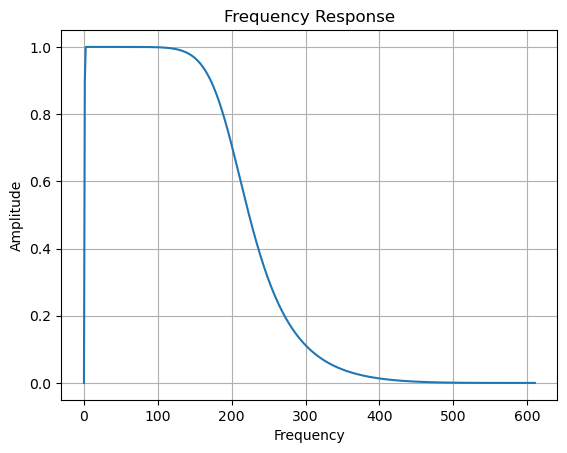

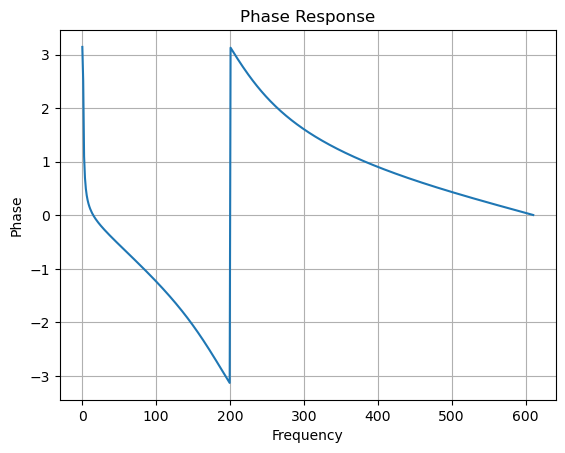

In [14]:
"""
巴特沃斯带通滤波器频响曲线
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 设计滤波器
passband_freq = [1, 200]  # 带通频率范围
sampling_freq = 1223  # 采样频率
filter_order = 4  # 滤波器阶数

nyquist_freq = 0.5 * sampling_freq
normalized_passband_freq = [freq / nyquist_freq for freq in passband_freq]
b, a = signal.butter(filter_order, normalized_passband_freq, btype='band')

# 计算频率响应
w, h = signal.freqz(b, a)

# 绘制振幅响应曲线
plt.figure()
plt.plot(w * sampling_freq / (2 * np.pi), np.abs(h))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Response')
plt.grid(True)

# 绘制相位响应曲线
plt.figure()
plt.plot(w * sampling_freq / (2 * np.pi), np.angle(h))
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Response')
plt.grid(True)

plt.show()